Import Required Libraries

In [1]:
import pandas as pd                    # For data manipulation and analysis
import numpy as np                     # For numerical operations
import matplotlib.pyplot as plt        # For data visualization
import seaborn as sns                 # For enhanced visualization
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.svm import SVC            # For Support Vector Classifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For evaluation metrics
from sklearn.preprocessing import StandardScaler  # For feature scaling

Load the Dataset


In [3]:
df = pd.read_csv('final_data.csv')

# Basic information about the dataset
print(df.info())
print(df.describe())
print(df.head())  # View the first few rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   int64  
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   int64  
 4   fc             1998 non-null   int64  
 5   four_g         1998 non-null   int64  
 6   int_memory     1998 non-null   int64  
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   pc             1998 non-null   int64  
 10  px_height      1998 non-null   float64
 11  px_width       1998 non-null   float64
 12  ram            1998 non-null   float64
 13  sc_h           1998 non-null   int64  
 14  sc_w           1998 non-null   float64
 15  talk_time      1998 non-null   int64  
 16  three_g        1998 non-null   int64  
 17  touch_screen   1998 non-null   int64  
 18  wifi    

Data Preprocessing


In [4]:
# Features and target variable
X = df.drop('price_range', axis=1)  # Drop target variable from features
y = df['price_range']                 # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling: Scale the features to have a mean of 0 and a variance of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training


In [5]:
# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can also try 'rbf' or other kernels

# Fit the model to the training data
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

Model Evaluation


In [6]:
# Predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9775


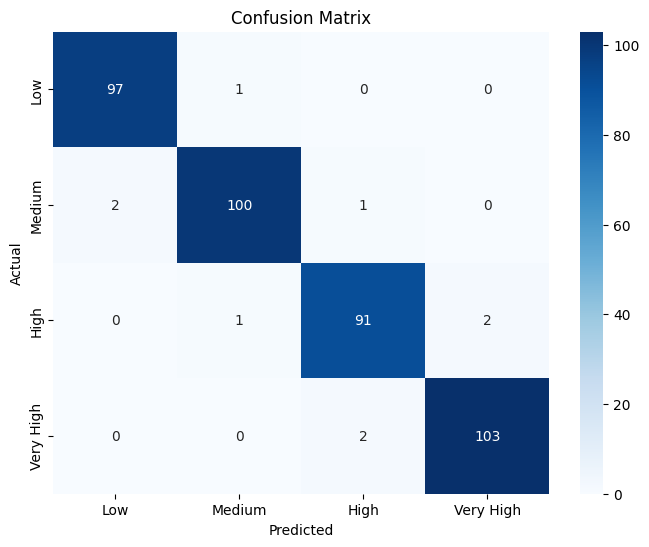

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        98
           1       0.98      0.97      0.98       103
           2       0.97      0.97      0.97        94
           3       0.98      0.98      0.98       105

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [6]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High', 'Very High'],
            yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

feature importances for a linear SVM

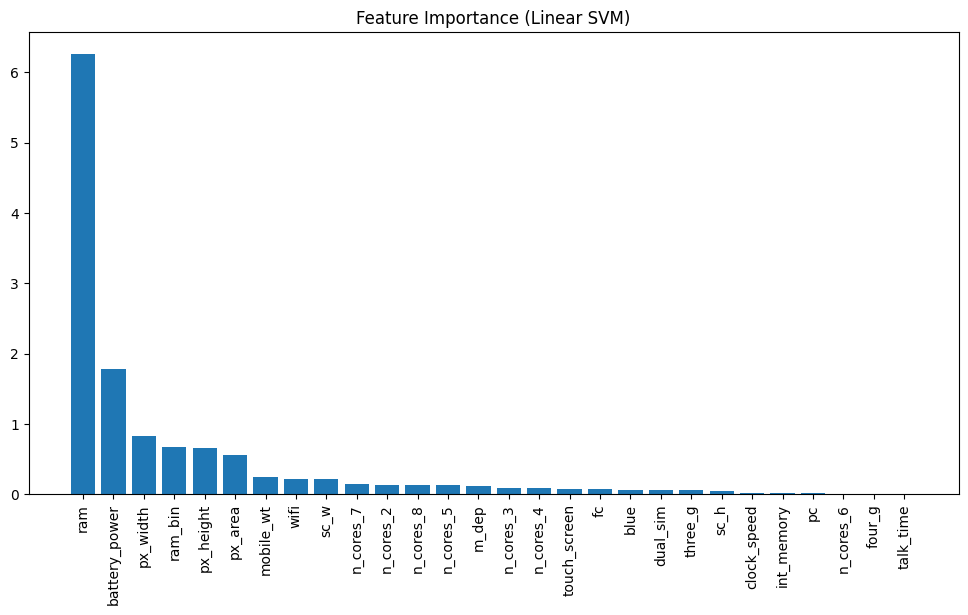

In [8]:
# Assuming you used a linear kernel
if svm_model.kernel == 'linear':
    feature_importance = np.abs(svm_model.coef_[0])  # Take the absolute value of the coefficients
    indices = np.argsort(feature_importance)[::-1]   # Sort indices based on importance

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importance (Linear SVM)")
    plt.bar(range(X.shape[1]), feature_importance[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.show()

K-fold Cross-Validation (for robustness)

In [9]:
from sklearn.model_selection import cross_val_score

# Perform K-fold cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.95       0.95       0.9725     0.93984962 0.95739348]
Mean CV Score: 0.9539486215538847
